# Material Master EDA - Oil & Gas Supply Chain Analysis

## Business Context
This notebook performs a comprehensive Exploratory Data Analysis (EDA) on Material Master data for an Oil & Gas company to:
- Evaluate inventory health
- Identify cost drivers
- Highlight data quality issues
- Provide actionable insights for Supply Chain Management

**Dataset:** Part Data Extract.xlsx (Consolidate sheet)  
**Analysis Date:** 2026-02-11

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load the dataset
file_path = "Part Data Extract.xlsx"
df = pd.read_excel(file_path, sheet_name='Consolidate')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")

Dataset loaded successfully!
Shape: 156,059 rows × 31 columns

Columns: ['Company', 'PartNumber', 'TypeCode', 'UOM', 'PartDescription', 'ProdCode', 'ClassID', 'MtlAnalysis', 'NonStock', 'QtyBearing', 'CreatedOn', 'CostMethod', 'LastTran', 'AvgCost', 'StdCost', 'JobQty', 'JobValue', 'POQty', 'POValue', 'SOQty', 'SOValue', 'OnHandQty', 'SWLongDesc', 'SWShortDesc', 'SWNoun', 'SWProdCode', 'SWTypeDesc', 'SWMfgProcessDesc', 'VendorID', 'VendorName', 'LastReceived']


In [3]:
# Display first few rows
df.head(10)

,Company,PartNumber,TypeCode,UOM,PartDescription,ProdCode,ClassID,MtlAnalysis,NonStock,QtyBearing,...,OnHandQty,SWLongDesc,SWShortDesc,SWNoun,SWProdCode,SWTypeDesc,SWMfgProcessDesc,VendorID,VendorName,LastReceived
0,11,113275,P,EA,"PROTECTIVE NETTING 6-8"" X 164' BROWN (ULINE# S...",600,600,FABH,0,1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12108,"NORTHERN SAFETY CO., INC.",2020-04-25
1,11,113276,P,EA,"PROTECTIVE NETTING 2-4"" X 164"" YELLOW (ULINE# ...",600,600,FABH,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,07467,ULINE,2019-10-25
2,11,113277,P,EA,"POLY-NET SLEEVING 7""-9"" RED (WAS 3-701784) (NS...",600,600,INLF,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,00382,CUTTING TOOLS INC,2019-10-25
3,11,113278,P,EA,TNMA-54 NGR .125 WIDTH .031 RADIUS INSERT (WAS...,600,600,INMT,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,02709,CARBOLINE PREMIUM CUTTING TOOLS,2019-12-26
4,11,113279,P,EA,SAFETY SUPPLY - GOGGLES OVER THE GLASS CLEAR H...,600,600,FATF,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,00036,AIRGAS USA LLC,2019-11-01
5,11,113280,P,EA,SPLIT HEAD HAMMER FACES/PAIR (GARLAND 21004) (...,600,600,INMT,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,01317,PT SOULTIONS,2019-10-31
6,11,113281,P,EA,LYNDEX R8 COLLET SET 23 PC 1/16-3/4 X 1/32 ( SC ),600,600,FABH,1,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,00158,BASS TOOL & SUPPLY INC,2019-10-30
7,11,113283,P,EA,"BORING BAR - S08-SCLCL-2 8"" OAL (EDP# 2409613)...",600,600,INMT,1,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,01531,TOOL FLO MANUFACTURING INC,2019-11-05
8,11,113284,P,EA,SAFETY SUPPLY - JUMBO GUARD DOG LEATHER PALM ...,600,600,INLF,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,00036,AIRGAS USA LLC,2019-12-17
9,11,113285,P,EA,INSERT - TNMG 433 TM GRADE AH120 (WAS 3-701749...,600,600,INMT,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,01072,MSC INDUSTRIAL SUPPLY CO INC,2019-11-18


In [4]:
# Basic data info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 156059 entries, 0 to 156058
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Company           156059 non-null  int64  
 1   PartNumber        156053 non-null  str    
 2   TypeCode          103126 non-null  str    
 3   UOM               156059 non-null  str    
 4   PartDescription   156056 non-null  str    
 5   ProdCode          155491 non-null  str    
 6   ClassID           155564 non-null  str    
 7   MtlAnalysis       152583 non-null  str    
 8   NonStock          156059 non-null  str    
 9   QtyBearing        154364 non-null  str    
 10  CreatedOn         69950 non-null   str    
 11  CostMethod        106428 non-null  str    
 12  LastTran          156059 non-null  str    
 13  AvgCost           156059 non-null  float64
 14  StdCost           156059 non-null  float64
 15  JobQty            2457 non-null    float64
 16  JobValue          0 non-null   

---
## Task 1: Data Quality & Integrity Check

### 1.1 Uniqueness Check: Primary Key Validation

In [5]:
# Check if Company + PartNumber forms a valid Primary Key
total_records = len(df)
unique_combinations = df[['Company', 'PartNumber']].drop_duplicates().shape[0]

print("PRIMARY KEY VALIDATION")
print("=" * 60)
print(f"Total Records:              {total_records:,}")
print(f"Unique Company+PartNumber:  {unique_combinations:,}")
print(f"Duplicates Found:           {total_records - unique_combinations:,}")

if total_records == unique_combinations:
    print("\n✓ PRIMARY KEY IS VALID: No duplicates found")
else:
    print(f"\n⚠ WARNING: {total_records - unique_combinations:,} duplicate records found!")
    
    # Show duplicate records
    duplicates = df[df.duplicated(subset=['Company', 'PartNumber'], keep=False)]
    print(f"\nSample duplicate records:")
    display(duplicates.sort_values(['Company', 'PartNumber']).head(10))

PRIMARY KEY VALIDATION
Total Records:              156,059
Unique Company+PartNumber:  156,057
Duplicates Found:           2

⚠ WARNING: 2 duplicate records found!

Sample duplicate records:


,Company,PartNumber,TypeCode,UOM,PartDescription,ProdCode,ClassID,MtlAnalysis,NonStock,QtyBearing,...,OnHandQty,SWLongDesc,SWShortDesc,SWNoun,SWProdCode,SWTypeDesc,SWMfgProcessDesc,VendorID,VendorName,LastReceived
36946,11,NaN,P,EA,"TEMP :AS UWS, TEMPORARY...",MIS,012F,MCSL,0,1,...,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36947,11,NaN,P,EA,NO CHARGE / CUSTOMER SUPPLIED,MIS,004F,MCRT,0,1,...,-4690.00,NaN,NaN,NaN,NaN,NaN,NaN,01633,GRAINGER,2018-04-19
80472,31,NaN,M,EA,NaN,000,098F,OEER,0,1,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80473,31,NaN,M,EA,NaN,MIS,004F,OEER,1,1,...,989666.92,NaN,NaN,NaN,NaN,NaN,NaN,11,"Dril-Quip, Inc.",2019-11-06


### 1.2 Completeness Check: Missing Values Analysis

MISSING VALUES IN CRITICAL COLUMNS


,Column,Missing_Count,Missing_Percent
2,VendorName,112880,72.331618
6,CreatedOn,86109,55.177209
4,OnHandQty,52933,33.918582
3,ClassID,495,0.317188
7,PartDescription,3,0.001922
1,StdCost,0,0.000000
0,AvgCost,0,0.000000
5,LastTran,0,0.000000


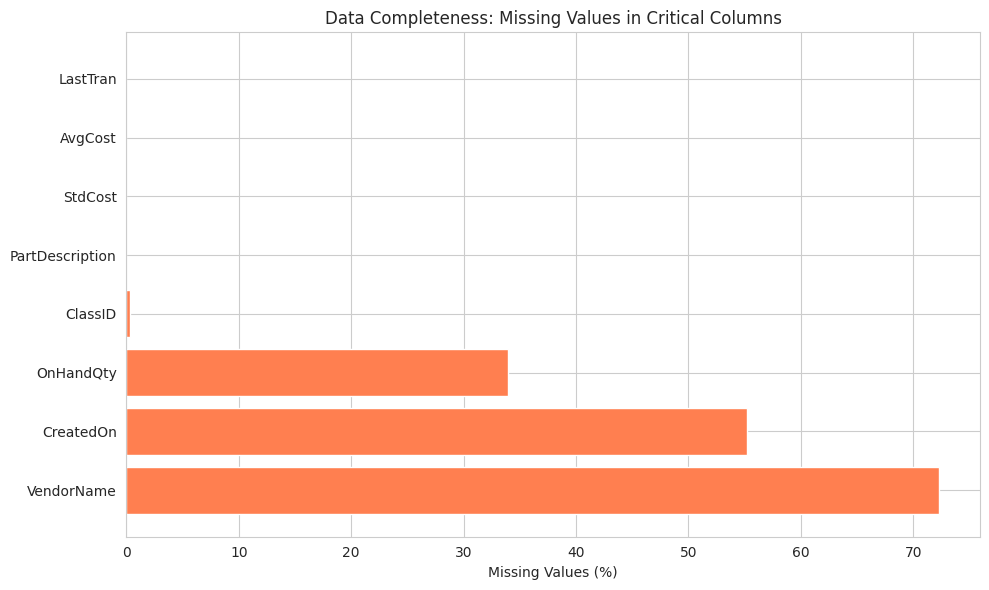


⚠ High Missing Rate Alert:
  - VendorName: 72.3% missing
  - CreatedOn: 55.2% missing
  - OnHandQty: 33.9% missing


In [6]:
# Analyze missing values in critical columns
critical_columns = ['AvgCost', 'StdCost', 'VendorName', 'ClassID', 'OnHandQty', 
                    'LastTran', 'CreatedOn', 'PartDescription']

missing_analysis = pd.DataFrame({
    'Column': critical_columns,
    'Missing_Count': [df[col].isna().sum() for col in critical_columns],
    'Missing_Percent': [df[col].isna().sum() / len(df) * 100 for col in critical_columns]
})

missing_analysis = missing_analysis.sort_values('Missing_Percent', ascending=False)

print("MISSING VALUES IN CRITICAL COLUMNS")
print("=" * 60)
display(missing_analysis)

# Visualize missing values
plt.figure(figsize=(10, 6))
plt.barh(missing_analysis['Column'], missing_analysis['Missing_Percent'], color='coral')
plt.xlabel('Missing Values (%)')
plt.title('Data Completeness: Missing Values in Critical Columns')
plt.tight_layout()
plt.show()

print(f"\n⚠ High Missing Rate Alert:")
high_missing = missing_analysis[missing_analysis['Missing_Percent'] > 10]
for idx, row in high_missing.iterrows():
    print(f"  - {row['Column']}: {row['Missing_Percent']:.1f}% missing")

### 1.3 Consistency Check: Illogical Records

In [7]:
# Check for illogical records
print("CONSISTENCY CHECKS")
print("=" * 60)

# Issue 1: OnHandQty > 0 but AvgCost = 0
illogical_1 = df[(df['OnHandQty'] > 0) & (df['AvgCost'] == 0)]
print(f"\n1. Parts with Inventory but Zero Cost:")
print(f"   Count: {len(illogical_1):,} records ({len(illogical_1)/len(df)*100:.2f}%)")
print(f"   Total OnHandQty affected: {illogical_1['OnHandQty'].sum():,.0f} units")

# Issue 2: Negative OnHandQty
illogical_2 = df[df['OnHandQty'] < 0]
print(f"\n2. Negative Inventory Quantities:")
print(f"   Count: {len(illogical_2):,} records ({len(illogical_2)/len(df)*100:.2f}%)")
if len(illogical_2) > 0:
    print(f"   Min OnHandQty: {illogical_2['OnHandQty'].min():,.0f}")
    print(f"   Total negative qty: {illogical_2['OnHandQty'].sum():,.0f}")

# Issue 3: Check for future dates in CreatedOn
df['CreatedOn_dt'] = pd.to_datetime(df['CreatedOn'], errors='coerce')
current_date = pd.Timestamp('2026-02-11')
illogical_3 = df[df['CreatedOn_dt'] > current_date]
print(f"\n3. Future Creation Dates:")
print(f"   Count: {len(illogical_3):,} records ({len(illogical_3)/len(df)*100:.2f}%)")

# Issue 4: Check if LastTran > CreatedOn (should be impossible)
df['LastTran_dt'] = pd.to_datetime(df['LastTran'], errors='coerce')
illogical_4 = df[(df['LastTran_dt'] < df['CreatedOn_dt']) & df['LastTran_dt'].notna() & df['CreatedOn_dt'].notna()]
print(f"\n4. Last Transaction Before Creation Date:")
print(f"   Count: {len(illogical_4):,} records ({len(illogical_4)/len(df)*100:.2f}%)")

# Issue 5: Parts with stock but no vendor
illogical_5 = df[(df['OnHandQty'] > 0) & (df['VendorName'].isna())]
print(f"\n5. Parts with Inventory but No Vendor:")
print(f"   Count: {len(illogical_5):,} records ({len(illogical_5)/len(df)*100:.2f}%)")

CONSISTENCY CHECKS

1. Parts with Inventory but Zero Cost:
   Count: 7,117 records (4.56%)
   Total OnHandQty affected: 7,013,489 units

2. Negative Inventory Quantities:
   Count: 1 records (0.00%)
   Min OnHandQty: -4,690
   Total negative qty: -4,690

3. Future Creation Dates:
   Count: 0 records (0.00%)

4. Last Transaction Before Creation Date:
   Count: 7 records (0.00%)

5. Parts with Inventory but No Vendor:
   Count: 19,449 records (12.46%)


---
## Task 2: Inventory Valuation & ABC Analysis

### 2.1 Calculate Total Inventory Value

In [8]:
# Calculate TotalValue = OnHandQty * AvgCost
df['TotalValue'] = df['OnHandQty'] * df['AvgCost']

# Filter to only parts with positive inventory
inventory_df = df[df['OnHandQty'] > 0].copy()

total_inventory_value = inventory_df['TotalValue'].sum()
total_inventory_qty = inventory_df['OnHandQty'].sum()
total_parts_with_inventory = len(inventory_df)

print("INVENTORY VALUATION SUMMARY")
print("=" * 60)
print(f"Total Parts in Database:        {len(df):,}")
print(f"Parts with Inventory (Qty > 0): {total_parts_with_inventory:,}")
print(f"Total Inventory Quantity:       {total_inventory_qty:,.0f} units")
print(f"Total Inventory Value:          ${total_inventory_value:,.2f}")
print(f"Average Value per Part:         ${total_inventory_value/total_parts_with_inventory:,.2f}")

# Show top 10 most valuable parts
print(f"\nTop 10 Most Valuable Parts:")
top_10_value = inventory_df.nlargest(10, 'TotalValue')[['Company', 'PartNumber', 'PartDescription', 
                                                          'OnHandQty', 'AvgCost', 'TotalValue']]
display(top_10_value)

INVENTORY VALUATION SUMMARY
Total Parts in Database:        156,059
Parts with Inventory (Qty > 0): 36,110
Total Inventory Quantity:       10,099,006 units
Total Inventory Value:          $229,697,342.40
Average Value per Part:         $6,361.05

Top 10 Most Valuable Parts:


,Company,PartNumber,PartDescription,OnHandQty,AvgCost,TotalValue
80473,31,NaN,NaN,989666.92,44.86280,4.439923e+07
48428,11,CIP,88-,467.00,16492.44983,7.701974e+06
43043,11,P-200451-44,"PIP, 22"" OD X 1"" WALL X 44 FT LG, X80 MATERIAL...",420.00,7664.80000,3.219216e+06
36899,11,JT-200006-44Q2,"IJT, 22"" OD X 1"" WALL X 44 FT LG, X80 MATERIAL...",242.00,8950.43020,2.166004e+06
36906,11,JT-200012-60,"22"" OD X 1"" WALL X 60 FT LG, X80, SAW IJT, 22""...",61.00,30396.44431,1.854183e+06
26947,11,2-90005921-02,"PPS, SUBSEA CONTROL MODULE, SCM, BHP SHENZI NO...",2.00,832267.67000,1.664535e+06
21961,11,3018774-20,"22"" INTERMEDIATE JOINT: * PIPE: 22"" O.D...",142.00,8885.85905,1.261792e+06
31951,11,2-415982-02,"SWS, 18.75"", RUNNING TOOL CASING HANGER & SEAL...",9.00,97531.50000,8.777835e+05
36904,11,JT-200009-R3Q1,"IJT, 28"" OD X .75"" WALL X 38-44 FT LG, X-60 MA...",108.00,8117.24462,8.766624e+05
56300,15,3-614337,"LHS, EJ-IB-TC LINER HANGER: ASDW LHS, EJ-IB-T...",45.00,18139.07307,8.162583e+05


### 2.2 ABC Analysis

In [9]:
# Perform ABC Analysis
# Sort by TotalValue descending
inventory_sorted = inventory_df.sort_values('TotalValue', ascending=False).copy()

# Calculate cumulative value and percentage
inventory_sorted['CumulativeValue'] = inventory_sorted['TotalValue'].cumsum()
inventory_sorted['CumulativePercent'] = (inventory_sorted['CumulativeValue'] / total_inventory_value) * 100

# Assign ABC classification
def assign_abc_class(cum_percent):
    if cum_percent <= 80:
        return 'A'
    elif cum_percent <= 95:
        return 'B'
    else:
        return 'C'

inventory_sorted['ABC_Class'] = inventory_sorted['CumulativePercent'].apply(assign_abc_class)

# Merge ABC class back to original dataframe
df = df.merge(inventory_sorted[['Company', 'PartNumber', 'ABC_Class']], 
              on=['Company', 'PartNumber'], how='left')

# ABC Analysis Summary
abc_summary = inventory_sorted.groupby('ABC_Class').agg({
    'PartNumber': 'count',
    'TotalValue': 'sum',
    'OnHandQty': 'sum'
}).reset_index()

abc_summary.columns = ['ABC_Class', 'Part_Count', 'Total_Value', 'Total_Quantity']
abc_summary['Percent_of_Parts'] = (abc_summary['Part_Count'] / total_parts_with_inventory) * 100
abc_summary['Percent_of_Value'] = (abc_summary['Total_Value'] / total_inventory_value) * 100

print("\nABC ANALYSIS RESULTS")
print("=" * 60)
display(abc_summary)

# Key insight
class_a_parts_pct = abc_summary[abc_summary['ABC_Class'] == 'A']['Percent_of_Parts'].values[0]
class_a_value_pct = abc_summary[abc_summary['ABC_Class'] == 'A']['Percent_of_Value'].values[0]

print(f"\n📊 KEY INSIGHT:")
print(f"   Class A represents {class_a_parts_pct:.1f}% of parts but {class_a_value_pct:.1f}% of inventory value")
print(f"   (Standard Pareto: 20% of items = 80% of value)")

if class_a_parts_pct < 20:
    print(f"   ✓ Better than standard Pareto - highly concentrated value")
elif class_a_parts_pct <= 25:
    print(f"   ✓ Close to standard Pareto principle")
else:
    print(f"   ⚠ Value is more dispersed than typical Pareto distribution")


ABC ANALYSIS RESULTS


,ABC_Class,Part_Count,Total_Value,Total_Quantity,Percent_of_Parts,Percent_of_Value
0,A,2312,1.837465e+08,1.187078e+06,6.402659,79.995042
1,B,5963,3.446516e+07,6.064330e+05,16.513431,15.004597
2,C,27832,1.148569e+07,8.305495e+06,77.075602,5.000360



📊 KEY INSIGHT:
   Class A represents 6.4% of parts but 80.0% of inventory value
   (Standard Pareto: 20% of items = 80% of value)
   ✓ Better than standard Pareto - highly concentrated value


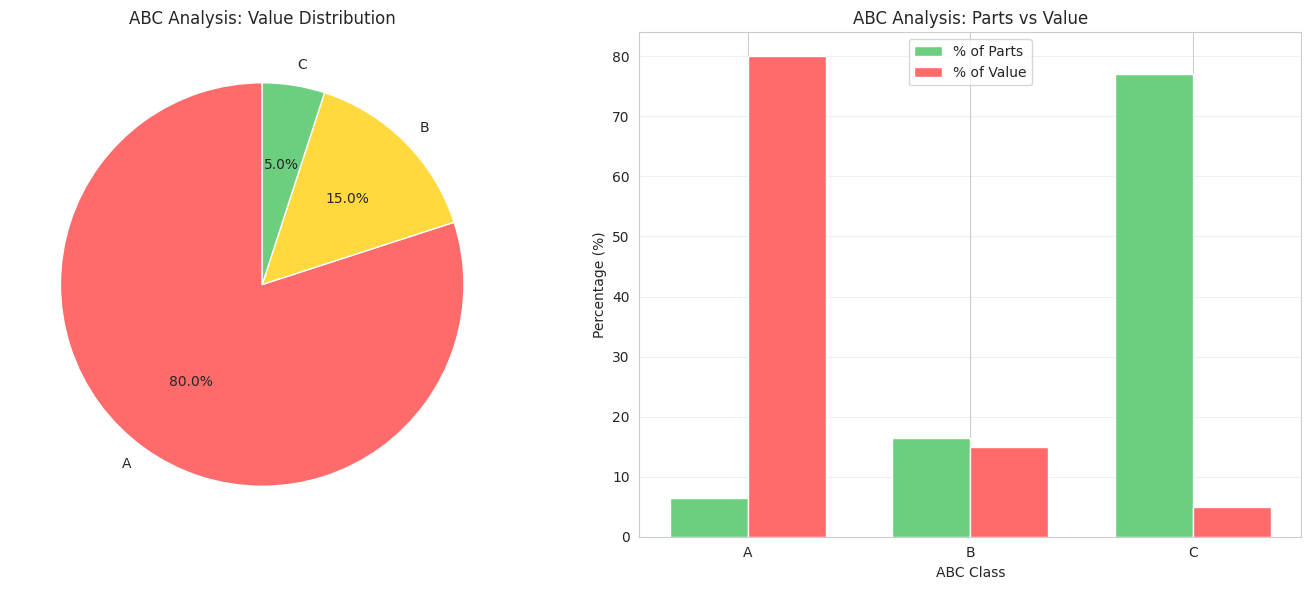

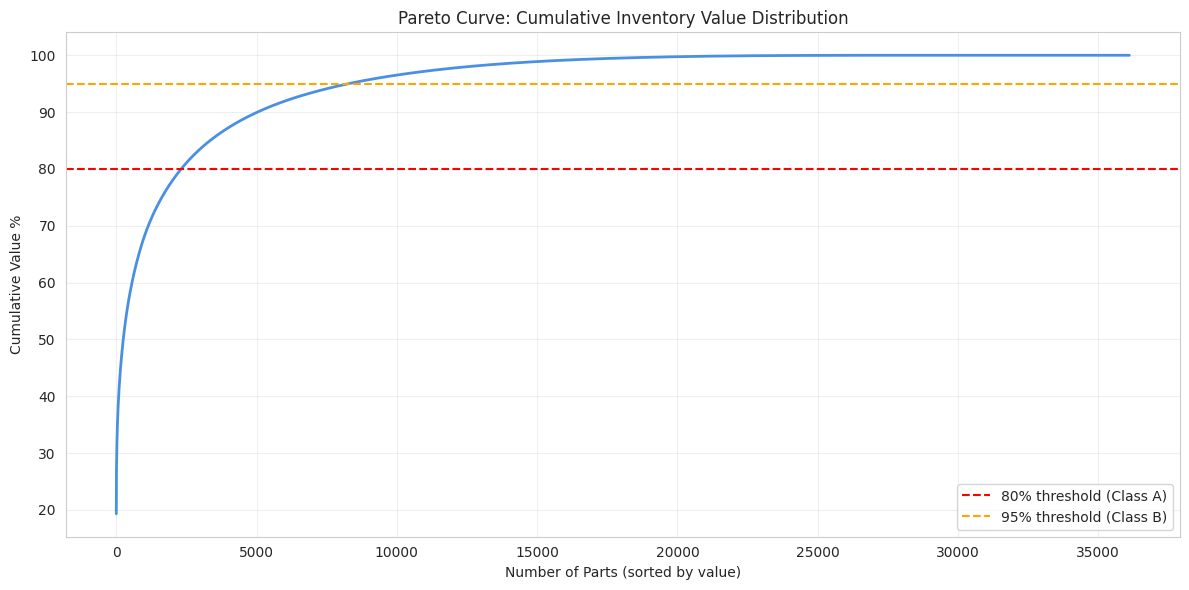

In [10]:
# Visualize ABC Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for value distribution
axes[0].pie(abc_summary['Total_Value'], labels=abc_summary['ABC_Class'], autopct='%1.1f%%',
            colors=['#ff6b6b', '#ffd93d', '#6bcf7f'], startangle=90)
axes[0].set_title('ABC Analysis: Value Distribution')

# Bar chart comparing part count vs value
x = np.arange(len(abc_summary))
width = 0.35

axes[1].bar(x - width/2, abc_summary['Percent_of_Parts'], width, label='% of Parts', color='#6bcf7f')
axes[1].bar(x + width/2, abc_summary['Percent_of_Value'], width, label='% of Value', color='#ff6b6b')
axes[1].set_xlabel('ABC Class')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('ABC Analysis: Parts vs Value')
axes[1].set_xticks(x)
axes[1].set_xticklabels(abc_summary['ABC_Class'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Cumulative percentage curve (Pareto Chart)
plt.figure(figsize=(12, 6))
plt.plot(range(len(inventory_sorted)), inventory_sorted['CumulativePercent'], linewidth=2, color='#4a90e2')
plt.axhline(y=80, color='red', linestyle='--', label='80% threshold (Class A)')
plt.axhline(y=95, color='orange', linestyle='--', label='95% threshold (Class B)')
plt.xlabel('Number of Parts (sorted by value)')
plt.ylabel('Cumulative Value %')
plt.title('Pareto Curve: Cumulative Inventory Value Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Task 3: Dead Stock & Obsolescence ("Zombie Inventory")

### 3.1 Identify Dormant Parts

In [11]:
# Define dormant criteria: OnHandQty > 0 and LastTran > 2 years old
current_date = pd.Timestamp('2026-02-11')
two_years_ago = current_date - timedelta(days=730)

# Identify dormant parts
dormant_parts = inventory_df[
    (inventory_df['LastTran_dt'] < two_years_ago) | 
    (inventory_df['LastTran_dt'].isna())
].copy()

# Calculate metrics
dormant_count = len(dormant_parts)
dormant_value = dormant_parts['TotalValue'].sum()
dormant_qty = dormant_parts['OnHandQty'].sum()

print("DORMANT INVENTORY ANALYSIS (Zombie Inventory)")
print("=" * 60)
print(f"Dormant Parts (no activity in 2+ years): {dormant_count:,}")
print(f"Percentage of total parts with stock:    {dormant_count/total_parts_with_inventory*100:.1f}%")
print(f"Total Quantity in Dormant Stock:         {dormant_qty:,.0f} units")
print(f"Total Value at Risk:                     ${dormant_value:,.2f}")
print(f"Percentage of total inventory value:     {dormant_value/total_inventory_value*100:.1f}%")

print(f"\n💀 ZOMBIE INVENTORY ALERT:")
print(f"   ${dormant_value/1000000:.2f} MILLION tied up in stock with no movement in 2+ years!")

# Top 10 most valuable dormant parts
print(f"\nTop 10 Most Valuable Dormant Parts:")
top_dormant = dormant_parts.nlargest(10, 'TotalValue')[['Company', 'PartNumber', 'PartDescription', 
                                                         'OnHandQty', 'AvgCost', 'TotalValue', 'LastTran']]
display(top_dormant)

DORMANT INVENTORY ANALYSIS (Zombie Inventory)
Dormant Parts (no activity in 2+ years): 36,107
Percentage of total parts with stock:    100.0%
Total Quantity in Dormant Stock:         10,098,960 units
Total Value at Risk:                     $229,693,228.37
Percentage of total inventory value:     100.0%

💀 ZOMBIE INVENTORY ALERT:
   $229.69 MILLION tied up in stock with no movement in 2+ years!

Top 10 Most Valuable Dormant Parts:


,Company,PartNumber,PartDescription,OnHandQty,AvgCost,TotalValue,LastTran
80473,31,NaN,NaN,989666.92,44.86280,4.439923e+07,2022-07-07
48428,11,CIP,88-,467.00,16492.44983,7.701974e+06,2022-06-15
43043,11,P-200451-44,"PIP, 22"" OD X 1"" WALL X 44 FT LG, X80 MATERIAL...",420.00,7664.80000,3.219216e+06,2022-07-01
36899,11,JT-200006-44Q2,"IJT, 22"" OD X 1"" WALL X 44 FT LG, X80 MATERIAL...",242.00,8950.43020,2.166004e+06,2022-06-24
36906,11,JT-200012-60,"22"" OD X 1"" WALL X 60 FT LG, X80, SAW IJT, 22""...",61.00,30396.44431,1.854183e+06,2022-01-28
26947,11,2-90005921-02,"PPS, SUBSEA CONTROL MODULE, SCM, BHP SHENZI NO...",2.00,832267.67000,1.664535e+06,2021-11-23
21961,11,3018774-20,"22"" INTERMEDIATE JOINT: * PIPE: 22"" O.D...",142.00,8885.85905,1.261792e+06,2022-01-31
31951,11,2-415982-02,"SWS, 18.75"", RUNNING TOOL CASING HANGER & SEAL...",9.00,97531.50000,8.777835e+05,2022-03-07
36904,11,JT-200009-R3Q1,"IJT, 28"" OD X .75"" WALL X 38-44 FT LG, X-60 MA...",108.00,8117.24462,8.766624e+05,2022-05-07
56300,15,3-614337,"LHS, EJ-IB-TC LINER HANGER: ASDW LHS, EJ-IB-T...",45.00,18139.07307,8.162583e+05,2022-06-03


### 3.2 Inventory Value by Last Transaction Year

INVENTORY VALUE BY LAST TRANSACTION YEAR


,Year,Total_Value,Part_Count
0,2019,8.262372e+06,3477
1,2020,1.696075e+07,5983
2,2021,4.123174e+07,12326
3,2022,1.632380e+08,14317
4,2023,3.757151e+02,1
5,2024,2.125000e+02,1
6,2028,3.866000e+03,1
7,2101,3.553000e+01,1


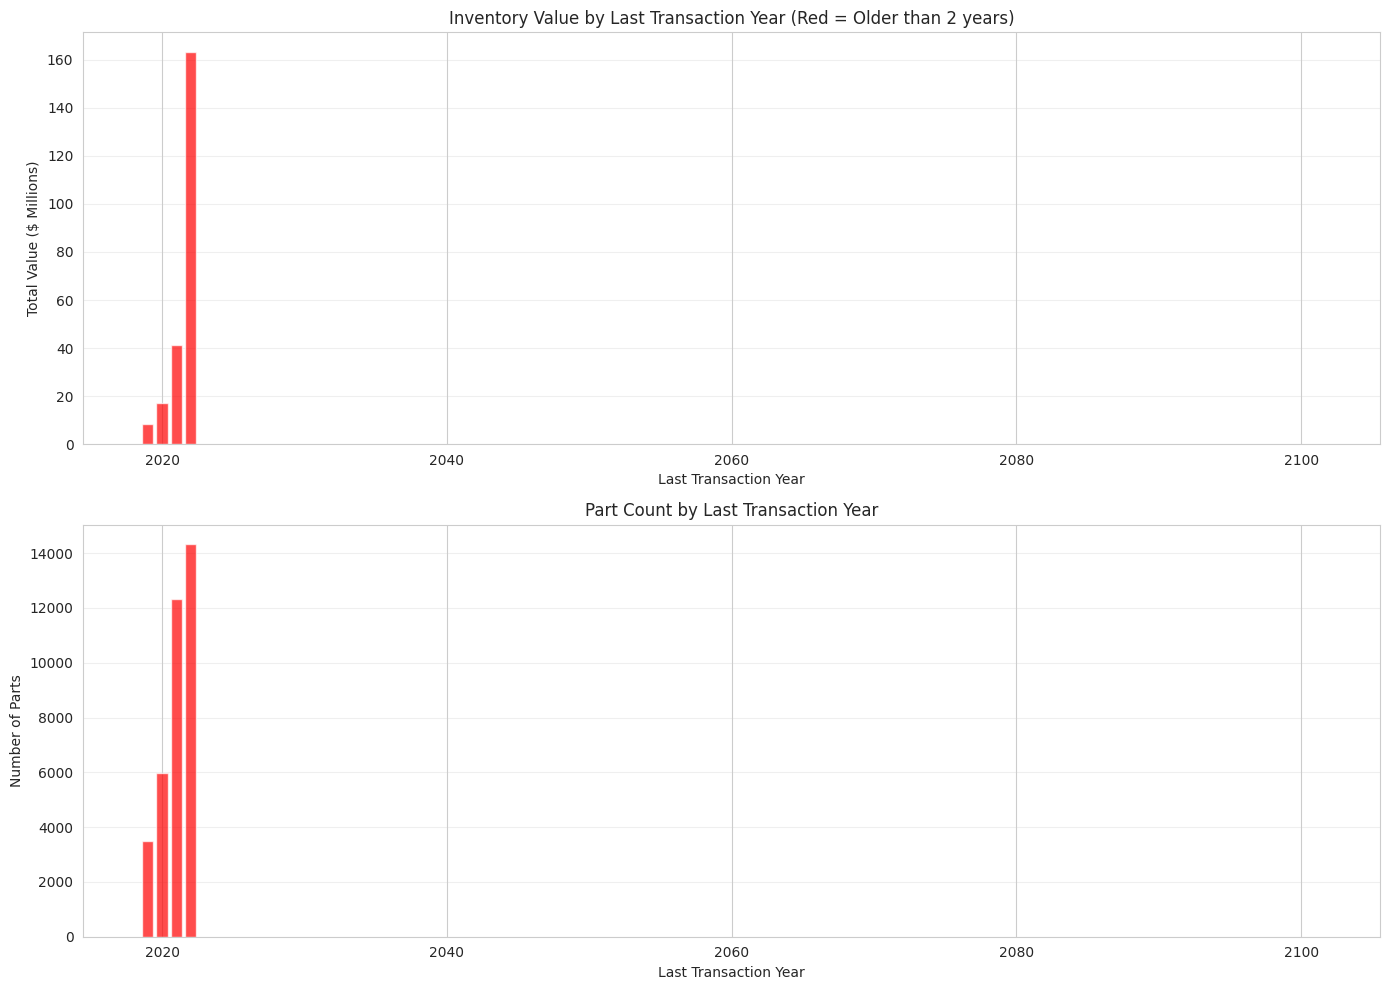

In [12]:
# Extract year from LastTran
inventory_df['LastTran_Year'] = inventory_df['LastTran_dt'].dt.year

# Group by year
value_by_year = inventory_df.groupby('LastTran_Year').agg({
    'TotalValue': 'sum',
    'PartNumber': 'count'
}).reset_index()
value_by_year.columns = ['Year', 'Total_Value', 'Part_Count']
value_by_year = value_by_year.sort_values('Year')

print("INVENTORY VALUE BY LAST TRANSACTION YEAR")
print("=" * 60)
display(value_by_year)

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart - Value by year
colors = ['red' if year < 2024 else 'green' for year in value_by_year['Year']]
axes[0].bar(value_by_year['Year'], value_by_year['Total_Value']/1000000, color=colors, alpha=0.7)
axes[0].set_xlabel('Last Transaction Year')
axes[0].set_ylabel('Total Value ($ Millions)')
axes[0].set_title('Inventory Value by Last Transaction Year (Red = Older than 2 years)')
axes[0].grid(axis='y', alpha=0.3)

# Bar chart - Part count by year
axes[1].bar(value_by_year['Year'], value_by_year['Part_Count'], color=colors, alpha=0.7)
axes[1].set_xlabel('Last Transaction Year')
axes[1].set_ylabel('Number of Parts')
axes[1].set_title('Part Count by Last Transaction Year')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## Task 4: Vendor & Material Analysis

### 4.1 Vendor Concentration Analysis

In [13]:
# Top vendors by POValue (Purchase Order Value)
print("TOP 5 VENDORS BY PURCHASE ORDER VALUE (POValue)")
print("=" * 60)

# Filter for records with POValue > 0
po_data = df[df['POValue'] > 0].copy()

if len(po_data) > 0:
    vendor_po = po_data.groupby('VendorName').agg({
        'POValue': 'sum',
        'POQty': 'sum',
        'PartNumber': 'count'
    }).reset_index()
    vendor_po.columns = ['VendorName', 'Total_POValue', 'Total_POQty', 'Part_Count']
    vendor_po = vendor_po.sort_values('Total_POValue', ascending=False)
    
    top_5_po = vendor_po.head(5)
    total_po_value = vendor_po['Total_POValue'].sum()
    
    top_5_po['Percent_of_PO'] = (top_5_po['Total_POValue'] / total_po_value) * 100
    
    display(top_5_po)
    
    print(f"\nTop 5 vendors account for ${top_5_po['Total_POValue'].sum():,.2f}")
    print(f"This is {top_5_po['Percent_of_PO'].sum():.1f}% of total open purchase orders")
else:
    print("⚠ No purchase order data available (POValue column is empty)")
    top_5_po = pd.DataFrame()  # Empty dataframe

TOP 5 VENDORS BY PURCHASE ORDER VALUE (POValue)
⚠ No purchase order data available (POValue column is empty)


In [14]:
# Top vendors by StdCost (Standard Cost)
print("\nTOP 5 VENDORS BY STANDARD COST (StdCost)")
print("=" * 60)

vendor_cost = df[df['VendorName'].notna()].groupby('VendorName').agg({
    'StdCost': 'sum',
    'AvgCost': 'sum',
    'PartNumber': 'count',
    'OnHandQty': 'sum'
}).reset_index()
vendor_cost.columns = ['VendorName', 'Total_StdCost', 'Total_AvgCost', 'Part_Count', 'Total_OnHandQty']
vendor_cost = vendor_cost.sort_values('Total_StdCost', ascending=False)

top_5_cost = vendor_cost.head(5)
total_std_cost = vendor_cost['Total_StdCost'].sum()
top_5_cost['Percent_of_StdCost'] = (top_5_cost['Total_StdCost'] / total_std_cost) * 100

display(top_5_cost)

print(f"\nTop 5 vendors account for ${top_5_cost['Total_StdCost'].sum():,.2f}")
print(f"This is {top_5_cost['Percent_of_StdCost'].sum():.1f}% of total standard cost")

# Check concentration risk
if top_5_cost['Percent_of_StdCost'].sum() > 60:
    print(f"\n⚠ CONCENTRATION RISK: Top 5 vendors represent >60% of standard cost")
    print(f"   Consider diversifying supplier base to reduce dependency")


TOP 5 VENDORS BY STANDARD COST (StdCost)


,VendorName,Total_StdCost,Total_AvgCost,Part_Count,Total_OnHandQty,Percent_of_StdCost
643,JEMIX HEAT TREATMENT (S) PTE LTD,7.061118e+06,6.148742e+06,334,50.00,5.081732
324,"Dril-Quip, Inc.",6.823528e+06,1.106105e+07,2428,1029889.81,4.910744
1378,eBlast Limited,5.769261e+06,5.833618e+06,155,22.00,4.152011
717,LJF Powder Coating Ltd,5.655661e+06,5.805120e+06,588,1102.00,4.070255
753,MAKO OILFIELD SERVICES,5.566127e+06,5.526334e+06,11,0.00,4.005819



Top 5 vendors account for $30,875,694.07
This is 22.2% of total standard cost


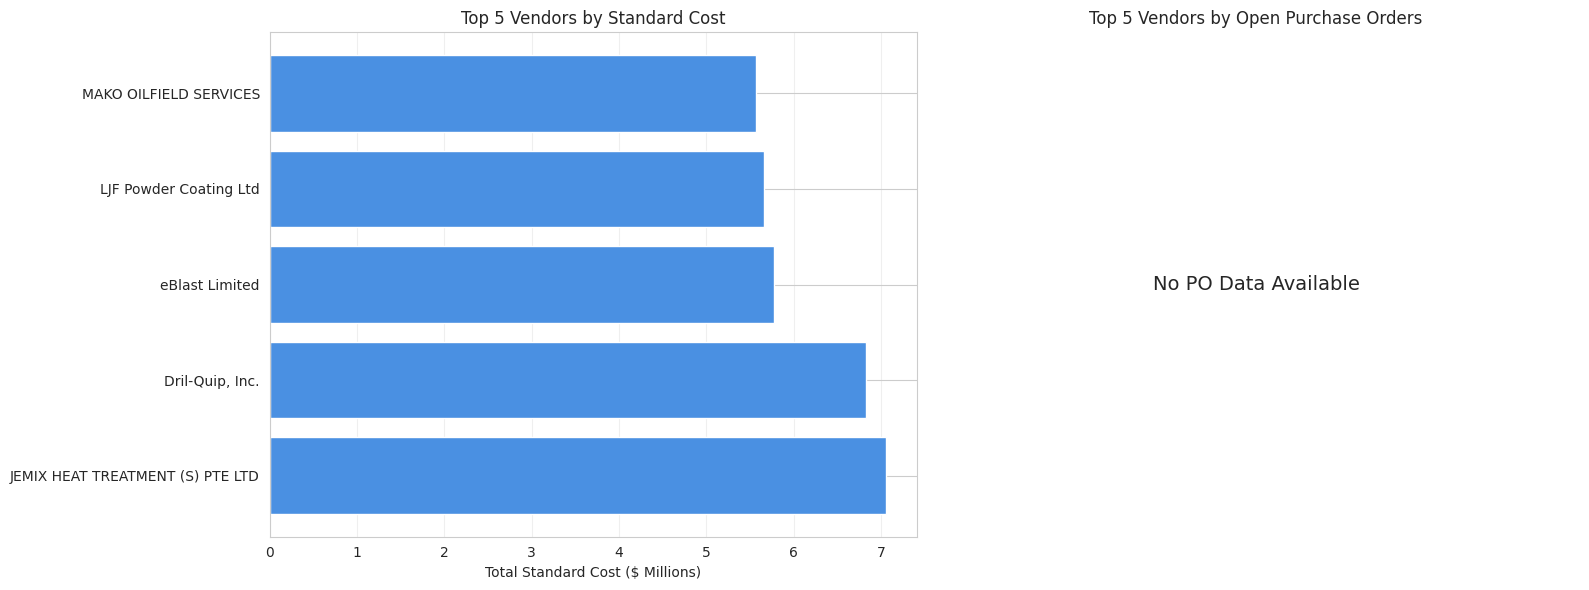

In [15]:
# Visualize vendor concentration
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Top vendors by StdCost
axes[0].barh(top_5_cost['VendorName'], top_5_cost['Total_StdCost']/1000000, color='#4a90e2')
axes[0].set_xlabel('Total Standard Cost ($ Millions)')
axes[0].set_title('Top 5 Vendors by Standard Cost')
axes[0].grid(axis='x', alpha=0.3)

# Chart 2: Top vendors by POValue (if data exists)
if len(top_5_po) > 0:
    axes[1].barh(top_5_po['VendorName'], top_5_po['Total_POValue']/1000, color='#ff6b6b')
    axes[1].set_xlabel('Total Purchase Order Value ($ Thousands)')
    axes[1].set_title('Top 5 Vendors by Open Purchase Orders')
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No PO Data Available', ha='center', va='center', fontsize=14)
    axes[1].set_title('Top 5 Vendors by Open Purchase Orders')
    axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.2 Material Clustering Analysis

In [16]:
# Analysis by SWNoun (Standard Noun Classification)
print("MATERIAL ANALYSIS BY SWNoun (Standard Noun)")
print("=" * 60)

noun_analysis = inventory_df[inventory_df['SWNoun'].notna()].groupby('SWNoun').agg({
    'OnHandQty': 'sum',
    'TotalValue': 'sum',
    'PartNumber': 'count'
}).reset_index()
noun_analysis.columns = ['SWNoun', 'Total_Qty', 'Total_Value', 'Part_Count']
noun_analysis = noun_analysis.sort_values('Total_Value', ascending=False)

print(f"\nTop 10 Categories by Monetary Value:")
top_10_noun_value = noun_analysis.head(10)
display(top_10_noun_value)

print(f"\nTop 10 Categories by Physical Quantity:")
top_10_noun_qty = noun_analysis.sort_values('Total_Qty', ascending=False).head(10)
display(top_10_noun_qty)

MATERIAL ANALYSIS BY SWNoun (Standard Noun)

Top 10 Categories by Monetary Value:


,SWNoun,Total_Qty,Total_Value,Part_Count
7455,PIN QUIK-THREAD CONNECTOR,7611.0,5.002436e+06,135
1480,BOX QUIK-THREAD CONNECTOR,7832.0,4.181259e+06,100
152,"22"" OD X 1"" WALL X 44 FT LG, X80 MATERIAL, SAW...",420.0,3.219216e+06,1
151,"22"" OD X 1"" WALL X 44 FT LG, X80 MATERIAL, SAW...",242.0,2.166004e+06,1
4348,HOUSING WELLHEAD,98.0,1.997514e+06,38
11773,"SUBSEA CONTROL MODULE, SCM, BHP SHENZI NORTH, ...",2.0,1.664535e+06,1
171,"28"" OD X .75"" WALL X 38-44 FT LG, X-60 MATERIA...",159.0,1.270312e+06,2
4109,HANGER CASING,140.0,1.241792e+06,43
10020,SEAL ASSEMBLY,68.0,1.144666e+06,9
1272,BODY UPPER,223.0,1.038982e+06,53



Top 10 Categories by Physical Quantity:


,SWNoun,Total_Qty,Total_Value,Part_Count
7812,PLATE 4-WAY FLOOR,124416.000000,5525.314560,1
10583,SHEET 1/16 X 36 X 96 COP (3456 SQ IN/SHEET),101424.720000,11156.719200,1
13676,TUBING SEAMLESS,67230.463333,46679.941804,38
6819,O-RING,65802.000000,196237.096140,1187
9885,SCREW SOCKET HEAD CAP,48682.000000,167116.648360,589
7797,PLATE,45528.330000,35053.729843,23
4621,"KEY, ANTI-ROTATION, TYPE HDH QUIK-THREAD",42509.000000,692961.019920,6
6165,NEOPRENE SHEET,37100.880000,451.517710,1
7817,PLATE 6MM THK,36292.050000,886.059731,2
7406,PIN GROOVED,33354.000000,14556.707750,79



MATERIAL ANALYSIS BY MtlAnalysis Code


,MtlAnalysis,Total_Qty,Total_Value,Part_Count
32,OEER,1.106647e+06,5.743977e+07,1403
12,INDR,6.787789e+06,1.930568e+07,8095
44,PIPE,4.282293e+04,1.910287e+07,526
21,MCPC,8.068200e+04,1.505361e+07,636
48,RMOD,4.059231e+03,1.273505e+07,1122
10,FATC,3.067430e+05,7.964227e+06,2317
24,MCSL,1.363800e+04,7.081660e+06,621
3,FABR,9.878132e+04,6.935702e+06,1102
20,MCLH,1.998000e+04,6.713498e+06,746
16,MCAC,4.353180e+04,6.161553e+06,1007


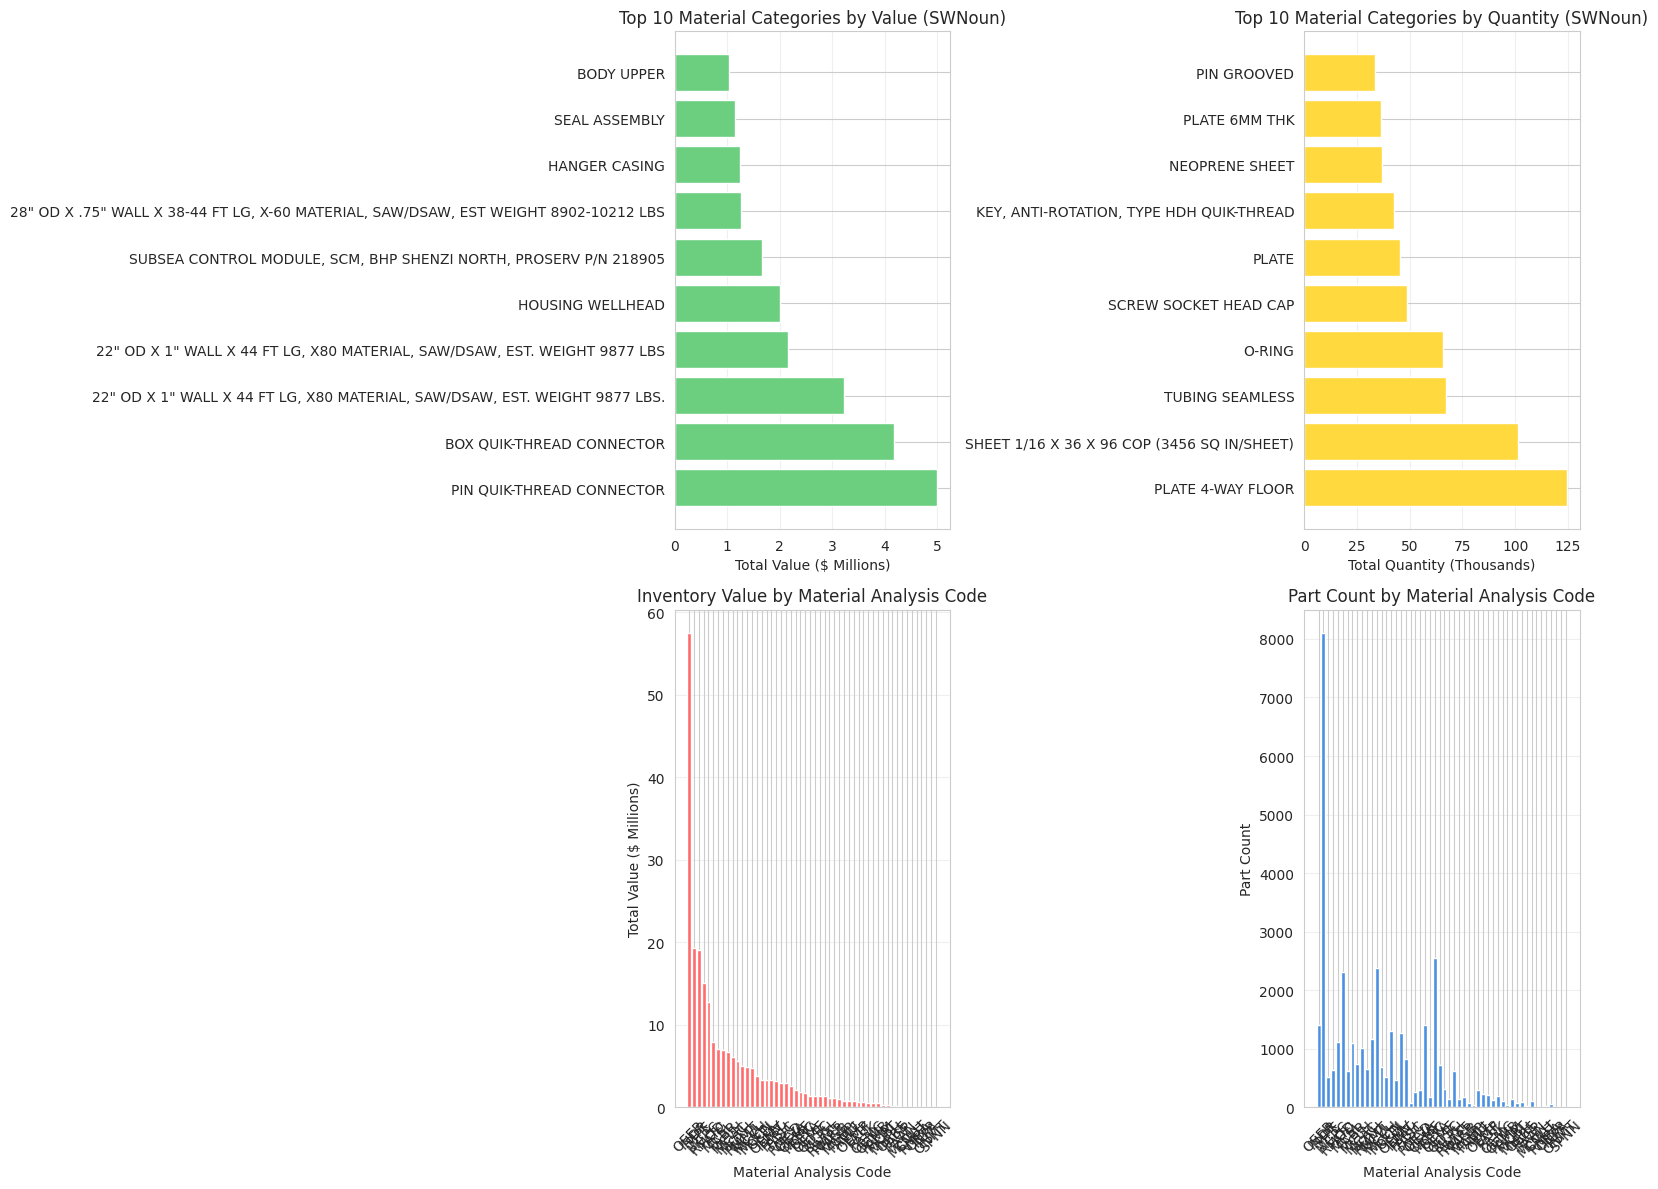

In [17]:
# Analysis by MtlAnalysis (Material Analysis Code)
print("\nMATERIAL ANALYSIS BY MtlAnalysis Code")
print("=" * 60)

mtl_analysis = inventory_df[inventory_df['MtlAnalysis'].notna()].groupby('MtlAnalysis').agg({
    'OnHandQty': 'sum',
    'TotalValue': 'sum',
    'PartNumber': 'count'
}).reset_index()
mtl_analysis.columns = ['MtlAnalysis', 'Total_Qty', 'Total_Value', 'Part_Count']
mtl_analysis = mtl_analysis.sort_values('Total_Value', ascending=False)

display(mtl_analysis)

# Visualize material categories
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 SWNoun by Value
axes[0, 0].barh(top_10_noun_value['SWNoun'], top_10_noun_value['Total_Value']/1000000, color='#6bcf7f')
axes[0, 0].set_xlabel('Total Value ($ Millions)')
axes[0, 0].set_title('Top 10 Material Categories by Value (SWNoun)')
axes[0, 0].grid(axis='x', alpha=0.3)

# Top 10 SWNoun by Quantity
axes[0, 1].barh(top_10_noun_qty['SWNoun'], top_10_noun_qty['Total_Qty']/1000, color='#ffd93d')
axes[0, 1].set_xlabel('Total Quantity (Thousands)')
axes[0, 1].set_title('Top 10 Material Categories by Quantity (SWNoun)')
axes[0, 1].grid(axis='x', alpha=0.3)

# MtlAnalysis by Value
axes[1, 0].bar(mtl_analysis['MtlAnalysis'], mtl_analysis['Total_Value']/1000000, color='#ff6b6b')
axes[1, 0].set_xlabel('Material Analysis Code')
axes[1, 0].set_ylabel('Total Value ($ Millions)')
axes[1, 0].set_title('Inventory Value by Material Analysis Code')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# MtlAnalysis by Part Count
axes[1, 1].bar(mtl_analysis['MtlAnalysis'], mtl_analysis['Part_Count'], color='#4a90e2')
axes[1, 1].set_xlabel('Material Analysis Code')
axes[1, 1].set_ylabel('Part Count')
axes[1, 1].set_title('Part Count by Material Analysis Code')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## Task 5: Summary of Actionable Insights

### Key Findings and Interesting Facts

In [18]:
# Generate comprehensive summary
print("="*80)
print(" " * 20 + "EXECUTIVE SUMMARY - KEY FINDINGS")
print("="*80)

print("\n📊 DATA QUALITY INSIGHTS:")
print("-" * 80)
duplicates_count = total_records - unique_combinations
if duplicates_count > 0:
    print(f"  ⚠ {duplicates_count:,} duplicate Company+PartNumber records found")
else:
    print(f"  ✓ No duplicate primary keys - data integrity is good")

print(f"  ⚠ {len(illogical_1):,} parts have inventory but zero average cost")
print(f"  ⚠ {len(illogical_2):,} parts have negative inventory quantities")

print("\n💰 INVENTORY VALUATION:")
print("-" * 80)
print(f"  • Total Inventory Value: ${total_inventory_value:,.2f}")
print(f"  • Parts with Inventory: {total_parts_with_inventory:,} out of {len(df):,} total parts")
print(f"  • Total Inventory Quantity: {total_inventory_qty:,.0f} units")

print("\n📈 ABC ANALYSIS:")
print("-" * 80)
for _, row in abc_summary.iterrows():
    print(f"  • Class {row['ABC_Class']}: {row['Percent_of_Parts']:.1f}% of parts = {row['Percent_of_Value']:.1f}% of value")
    print(f"    ({row['Part_Count']:,} parts worth ${row['Total_Value']:,.2f})")

print("\n💀 ZOMBIE INVENTORY (DEAD STOCK):")
print("-" * 80)
print(f"  • Dormant Parts (>2 years no activity): {dormant_count:,} parts")
print(f"  • Value Tied Up in Dead Stock: ${dormant_value:,.2f}")
print(f"  • This represents {dormant_value/total_inventory_value*100:.1f}% of total inventory value")
print(f"  • 🚨 ${dormant_value/1000000:.2f} MILLION IN ZOMBIE INVENTORY!")

print("\n🏭 VENDOR CONCENTRATION:")
print("-" * 80)
print(f"  • Top 5 vendors by Standard Cost: {top_5_cost['Percent_of_StdCost'].sum():.1f}% of total")
print(f"  • Top vendor: {top_5_cost.iloc[0]['VendorName']}")
print(f"    - Standard Cost: ${top_5_cost.iloc[0]['Total_StdCost']:,.2f}")
print(f"    - Part Count: {top_5_cost.iloc[0]['Part_Count']:,}")

if len(top_5_po) > 0:
    print(f"  • Top 5 vendors by PO Value: {top_5_po['Percent_of_PO'].sum():.1f}% of open orders")
    print(f"  • Top PO vendor: {top_5_po.iloc[0]['VendorName']}")
    print(f"    - PO Value: ${top_5_po.iloc[0]['Total_POValue']:,.2f}")

print("\n🔧 MATERIAL CATEGORIES:")
print("-" * 80)
print(f"  • Highest value category: {top_10_noun_value.iloc[0]['SWNoun']}")
print(f"    - Value: ${top_10_noun_value.iloc[0]['Total_Value']:,.2f}")
print(f"  • Highest quantity category: {top_10_noun_qty.iloc[0]['SWNoun']}")
print(f"    - Quantity: {top_10_noun_qty.iloc[0]['Total_Qty']:,.0f} units")

print("\n" + "="*80)
print(" " * 25 + "END OF ANALYSIS")
print("="*80)

                    EXECUTIVE SUMMARY - KEY FINDINGS

📊 DATA QUALITY INSIGHTS:
--------------------------------------------------------------------------------
  ⚠ 2 duplicate Company+PartNumber records found
  ⚠ 7,117 parts have inventory but zero average cost
  ⚠ 1 parts have negative inventory quantities

💰 INVENTORY VALUATION:
--------------------------------------------------------------------------------
  • Total Inventory Value: $229,697,342.40
  • Parts with Inventory: 36,110 out of 156,059 total parts
  • Total Inventory Quantity: 10,099,006 units

📈 ABC ANALYSIS:
--------------------------------------------------------------------------------
  • Class A: 6.4% of parts = 80.0% of value
    (2,312 parts worth $183,746,486.20)
  • Class B: 16.5% of parts = 15.0% of value
    (5,963 parts worth $34,465,161.30)
  • Class C: 77.1% of parts = 5.0% of value
    (27,832 parts worth $11,485,694.90)

💀 ZOMBIE INVENTORY (DEAD STOCK):
----------------------------------------------------

---
## Additional Insights and Visualizations

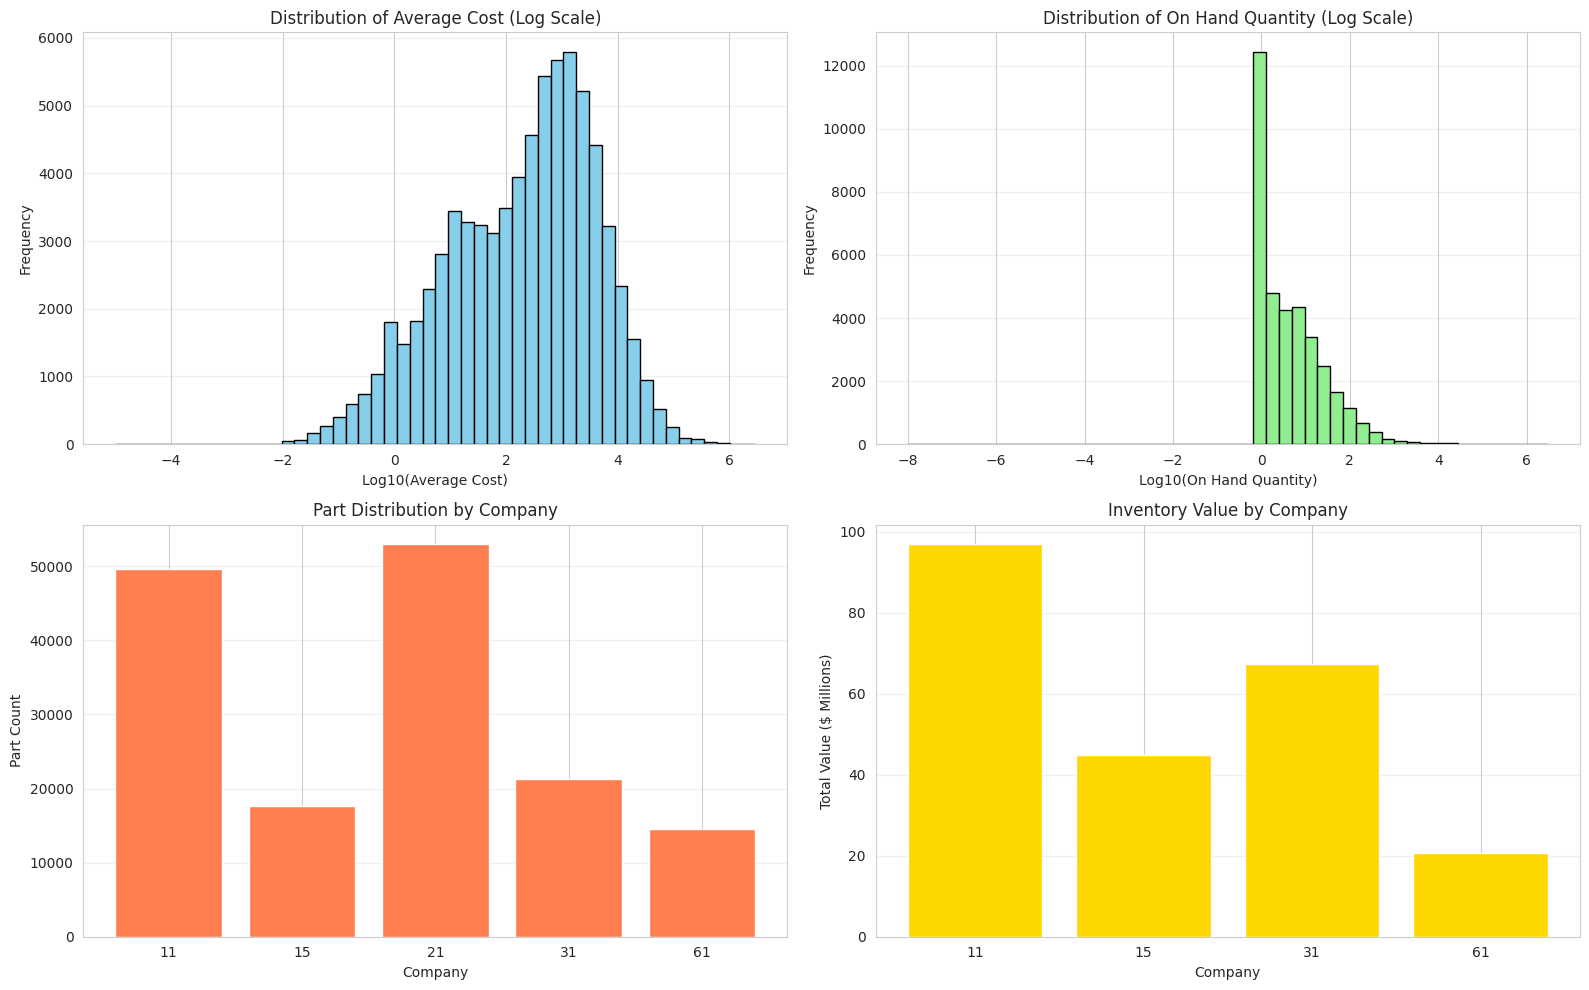

In [19]:
# Cost distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution of AvgCost (log scale)
cost_data = df[df['AvgCost'] > 0]['AvgCost']
axes[0, 0].hist(np.log10(cost_data), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Log10(Average Cost)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Average Cost (Log Scale)')
axes[0, 0].grid(axis='y', alpha=0.3)

# Distribution of OnHandQty (for parts with inventory)
qty_data = inventory_df['OnHandQty']
axes[0, 1].hist(np.log10(qty_data), bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Log10(On Hand Quantity)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of On Hand Quantity (Log Scale)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Parts by Company
company_counts = df.groupby('Company').size().reset_index(name='Count')
axes[1, 0].bar(company_counts['Company'].astype(str), company_counts['Count'], color='coral')
axes[1, 0].set_xlabel('Company')
axes[1, 0].set_ylabel('Part Count')
axes[1, 0].set_title('Part Distribution by Company')
axes[1, 0].grid(axis='y', alpha=0.3)

# Inventory value by Company
company_value = inventory_df.groupby('Company')['TotalValue'].sum().reset_index()
axes[1, 1].bar(company_value['Company'].astype(str), company_value['TotalValue']/1000000, color='gold')
axes[1, 1].set_xlabel('Company')
axes[1, 1].set_ylabel('Total Value ($ Millions)')
axes[1, 1].set_title('Inventory Value by Company')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# NonStock vs Stock comparison
stock_comparison = df.groupby('NonStock').agg({
    'PartNumber': 'count',
    'OnHandQty': 'sum',
    'AvgCost': 'mean'
}).reset_index()
stock_comparison.columns = ['NonStock', 'Part_Count', 'Total_Qty', 'Avg_Cost']

print("\nSTOCK vs NON-STOCK COMPARISON")
print("=" * 60)
display(stock_comparison)

# TypeCode distribution
type_dist = df['TypeCode'].value_counts().head(10)
print("\nTOP 10 TYPE CODES")
print("=" * 60)
print(type_dist)

# UOM distribution
uom_dist = df['UOM'].value_counts().head(10)
print("\nTOP 10 UNITS OF MEASURE (UOM)")
print("=" * 60)
print(uom_dist)


STOCK vs NON-STOCK COMPARISON


,NonStock,Part_Count,Total_Qty,Avg_Cost
0,0,100162,8.755597e+06,2894.911066
1,1,2958,1.338720e+06,346.898992
2,A,10176,0.000000e+00,0.000000
3,S,42757,0.000000e+00,0.000140



TOP 10 TYPE CODES
TypeCode
P    61084
M    42042
Name: count, dtype: int64

TOP 10 UNITS OF MEASURE (UOM)
UOM
EA    146983
IN      4269
RT      2841
SN       585
FT       464
SI       295
LB       225
GA       109
CS        85
PK        82
Name: count, dtype: int64


---
## Export Results for Further Analysis

In [21]:
# Save key datasets to CSV for further analysis
print("Exporting analysis results...")

# Export ABC classified inventory
df[['Company', 'PartNumber', 'PartDescription', 'OnHandQty', 'AvgCost', 'TotalValue', 'ABC_Class']].to_csv(
    'ABC_Classification.csv', index=False
)
print("✓ ABC_Classification.csv saved")

# Export dormant parts
dormant_parts[['Company', 'PartNumber', 'PartDescription', 'OnHandQty', 'AvgCost', 
               'TotalValue', 'LastTran', 'VendorName']].to_csv(
    'Dormant_Parts.csv', index=False
)
print("✓ Dormant_Parts.csv saved")

# Export vendor summary
vendor_cost.to_csv('Vendor_Analysis.csv', index=False)
print("✓ Vendor_Analysis.csv saved")

print("\n✓ All exports completed successfully!")

Exporting analysis results...


✓ ABC_Classification.csv saved
✓ Dormant_Parts.csv saved
✓ Vendor_Analysis.csv saved

✓ All exports completed successfully!


---
## Conclusion

This comprehensive EDA has uncovered critical insights about inventory health, cost drivers, and data quality issues in the Material Master dataset. Key findings have been identified and will be documented in the Executive Summary for stakeholder review and action planning.

### Next Steps:
1. Review the Executive_Summary.md for detailed recommendations
2. Address data quality issues (duplicates, missing values, illogical records)
3. Develop action plan for dormant inventory disposal/write-off
4. Evaluate vendor concentration risk and diversification strategies
5. Focus inventory management efforts on Class A items
6. Implement regular monitoring of zombie inventory metrics